<a href="https://colab.research.google.com/github/Javote/silver-memory/blob/master/Desafio1_v2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython
iframe = '<div style="width: 100%;"><div style="position: relative; padding-bottom: 56.25%; padding-top: 0; height: 0;"><iframe frameborder="0" width="1200" height="675" style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;" src="https://view.genial.ly/5f846f11488e550d336e4749" type="text/html" allowscriptaccess="always" allowfullscreen="true" scrolling="yes" allownetworking="all"></iframe> </div> </div>'
IPython.display.HTML(iframe)

##### Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Read Data

In [ ]:
data_TrueNews=pd.read_csv('True.csv')

In [ ]:
data_FakeNews=pd.read_csv('Fake.csv')

In [ ]:
data_TrueNews.shape

(21417, 4)

In [ ]:
data_FakeNews.shape

(23481, 4)

In [ ]:
data_TrueNews['Target']=[1 for i in range(len(data_TrueNews))]

In [ ]:
data_FakeNews['Target']=[0 for i in range(len(data_FakeNews))]

In [ ]:
data_AllNews=pd.concat([data_TrueNews, data_FakeNews])

In [ ]:
len(data_AllNews)

44898

In [ ]:
data_AllNews.reset_index(inplace=True)

In [ ]:
data_AllNews.drop(columns=['index'],axis=1,inplace=True)

In [ ]:
data_AllNews.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data_AllNews['title_text']=data_AllNews['title']+' '+data_AllNews['text']

In [ ]:
data_AllNews_titletext =data_AllNews.copy()

In [ ]:
data_AllNews_titletext.drop(columns=['title','text','subject','date'],axis=1,inplace=True)

In [ ]:
data_AllNews_titletext=data_AllNews_titletext[['title_text','Target']]

In [ ]:
data_AllNews_titletext.head()

,title_text,Target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [ ]:
print(pd.value_counts(data_AllNews_titletext['Target'], sort = True))

0    23481
1    21417
Name: Target, dtype: int64


In [ ]:
data_AllNews_titletext['title_text'][0].strip().split()[2]

'budget'

In [ ]:
data_AllNews_titletext=data_AllNews_titletext.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
len((data_AllNews_titletext['title_text'][1].strip().split()))

633

In [ ]:
len(data_AllNews_titletext['title_text'])

44898

In [ ]:
data_AllNews_titletext['title_text'].head()

0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: title_text, dtype: object

### StopWords

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [ ]:
import re,string,unicodedata
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
#data_AllNews_titletext['title_text']=data_AllNews_titletext['title_text'].apply(denoise_text)

In [ ]:
list_StopWords_2=stopwords.words('english')

### Visualizacion de Data

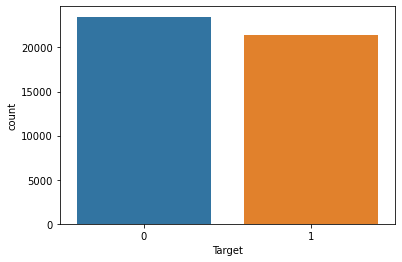

In [ ]:
ax = sns.countplot(x="Target", data=data_AllNews)

In [ ]:
def words_counter(data,ngram):

    vectorizer = CountVectorizer(ngram_range=ngram,max_features=1000,stop_words=list_StopWords_2)
    X=vectorizer.fit_transform(data)
    X_=X.toarray()
    X_words=vectorizer.get_feature_names()

    Words_Count=np.zeros(X_.shape[1])

    for j in range(X_.shape[1]):
        for i in range(X_.shape[0]):
            Words_Count[j]=X_[i,j]+Words_Count[j]
        
    df = pd.DataFrame(columns=['x','y'])
    df['x']=X_words
    df['y']=Words_Count
    df=df.sort_values(['y'], ascending=[False])
    
    return df


In [ ]:
X_true=data_AllNews_titletext[data_AllNews_titletext.Target==1]['title_text']
X_fake=data_AllNews_titletext[data_AllNews_titletext.Target==0]['title_text']

In [ ]:
words_count_true_1_1=words_counter(X_true,(1,1))
words_count_fake_1_1=words_counter(X_fake,(1,1))

In [ ]:
words_count_true_2_2=words_counter(X_true,(2,2))
words_count_fake_2_2=words_counter(X_fake,(2,2))

In [ ]:
words_count_true_3_3=words_counter(X_true,(3,3))
words_count_fake_3_3=words_counter(X_fake,(3,3))

In [ ]:
def plot_top_ngram(words_count_true,words_count_fake):
    f = plt.figure(figsize=(20, 5))
    gs = f.add_gridspec(1, 2)

    with sns.axes_style("darkgrid"):
        ax = f.add_subplot(gs[0, 0])
        ax=sns.barplot(y=words_count_true['x'][0:20],x=words_count_true['y'][0:20]).set_title('True News')
        ax = f.add_subplot(gs[0, 1])
        ax=sns.barplot(y=words_count_fake['x'][0:20],x=words_count_fake['y'][0:20]).set_title('Fake News')

    f.tight_layout()

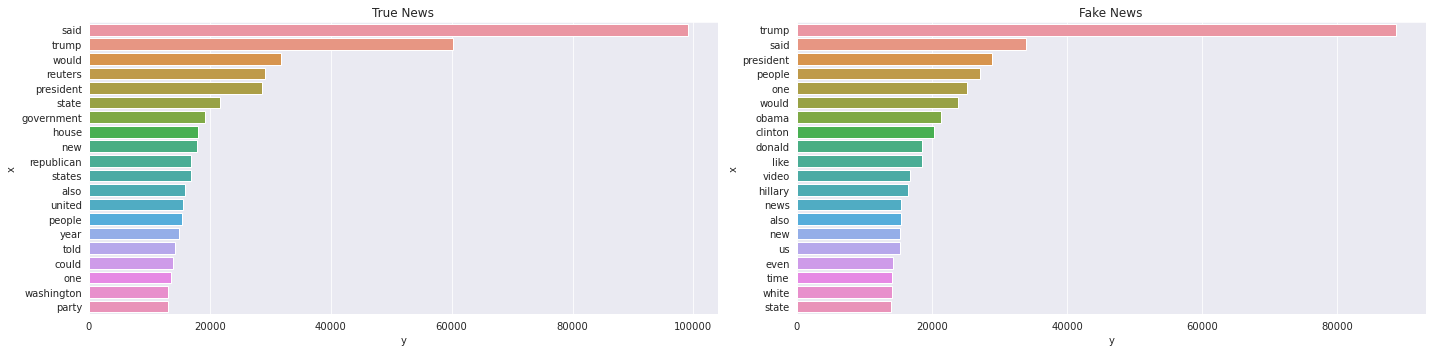

In [ ]:
plot_top_ngram(words_count_true_1_1,words_count_fake_1_1)

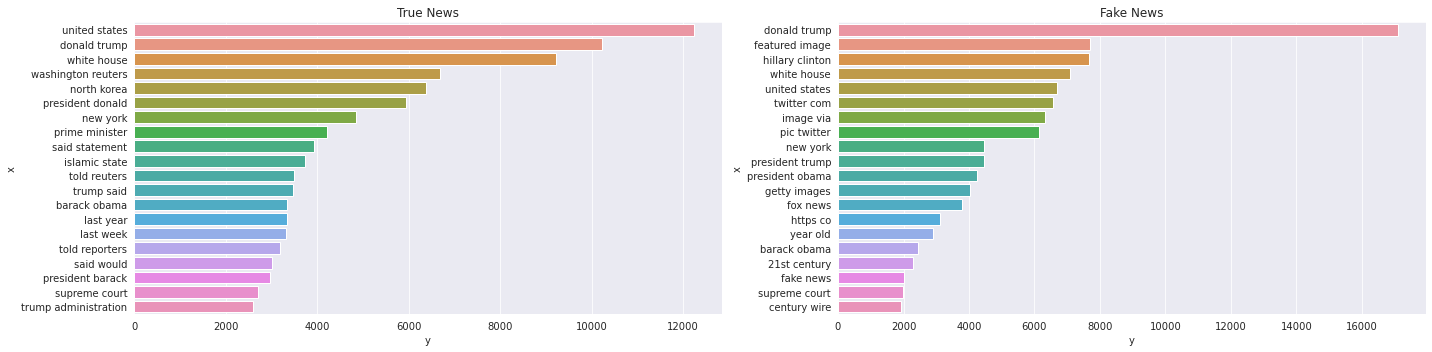

In [ ]:
plot_top_ngram(words_count_true_2_2,words_count_fake_2_2)

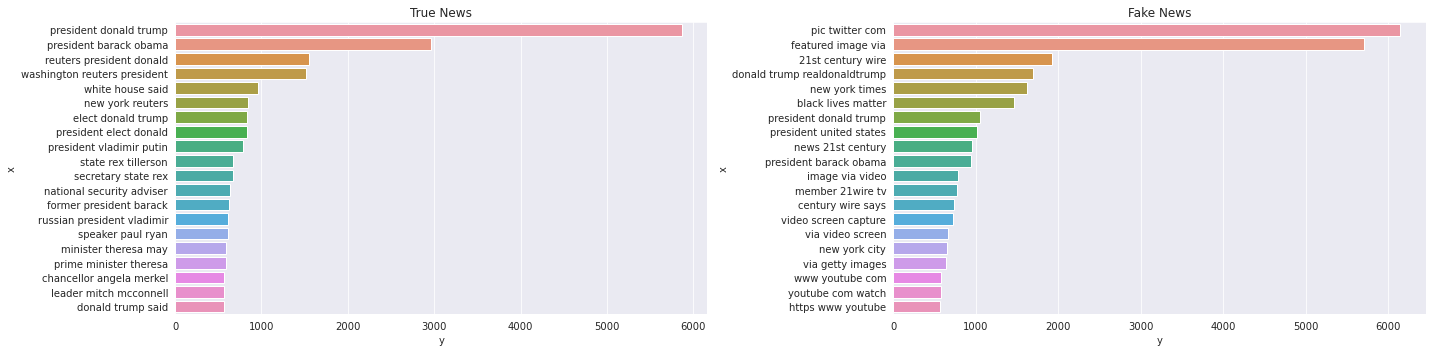

In [ ]:
plot_top_ngram(words_count_true_3_3,words_count_fake_3_3)

### Visualizacion WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

def wordCloudPlot(serie):
    text = " ".join(news for news in serie)#data_AllNews['title_text'])

    wordcloud = WordCloud().generate(text.lower())#(data_AllNews['title_text']) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
data_TrueNews.head(5)
data_T = data_TrueNews.title + '' + data_TrueNews.text
wordCloudPlot(data_T)

In [ ]:
data_FakeNews.head(5)
data_F = data_FakeNews.title + ' ' + data_FakeNews.text
wordCloudPlot(data_F)

## Preprocesing

In [ ]:
from sklearn.model_selection import train_test_split
y=data_AllNews_titletext['Target']
X_train, X_test, y_train, y_test = train_test_split(
    data_AllNews_titletext['title_text'], y, test_size=0.2, random_state=42)


### tf-idf(t, d) = tf(t, d) * idf(t)

#### tf: Es la probalidad de la palabra dentro del documento, ej: ‘And’ aparece 2 veces en un total de 10 palabras tf=2/10
#### idf: log(n/df(t)) +1 , ej: ‘And’ aparece en 5 documentos y el total del docuemtos del set es 20 idf=log(20/5)+1

In [ ]:
def Vectorizer_text(X_train,X_test,n_gram,stop_words_):
    vectorizer = TfidfVectorizer(ngram_range=n_gram,max_features=1000,stop_words=stop_words_) 
    X_train_ = vectorizer.fit_transform(X_train)
    
    vectorizer = TfidfVectorizer(ngram_range=n_gram,max_features=1000,stop_words=stop_words_)
    X_test_ = vectorizer.fit_transform(X_test)
    
    return X_train_.toarray(),X_test_.toarray()


In [ ]:
X_train_1_1,X_test_1_1=Vectorizer_text(X_train, X_test,(1,1),stop_words_=[])

In [ ]:
X_train_2_2,X_test_2_2=Vectorizer_text(X_train, X_test,(2,2),stop_words_=[])

In [ ]:
X_train_1_3,X_test_1_3=Vectorizer_text(X_train, X_test,(1,3),stop_words_=[])

In [ ]:
#X_train_3_3,X_test_3_3=Vectorizer_text(X_train, X_test,(3,3))

In [ ]:
X_train_1_1_sw,X_test_1_1_sw=Vectorizer_text(X_train, X_test,(1,1),stop_words_=list_StopWords_2)

In [ ]:
X_train_2_2_sw,X_test_2_2_sw=Vectorizer_text(X_train, X_test,(2,2),stop_words_=list_StopWords_2)

In [ ]:
X_train_1_3_sw,X_test_1_3_sw=Vectorizer_text(X_train, X_test,(1,3),stop_words_=list_StopWords_2)

# Implementacion de la Red Neuronal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
callbacks_list = []

In [ ]:
network_L2 = Sequential(name='Modelo_L2')
network_L2.add(Dense(100, activation='sigmoid', input_shape=(1000,),
                   kernel_regularizer=regularizers.l1(0.01)))
network_L2.add(Dropout(0.4))
network_L2.add(Dense(10, activation='sigmoid',
                   kernel_regularizer=regularizers.l1(0.01)))
network_L2.add(Dense(1, activation='sigmoid'))

network_L2.summary()

Model: "Modelo_L2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               100100    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 101,121
Trainable params: 101,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network = Sequential() 

network.add(Dense(100, activation='sigmoid', input_dim=1000))
network.add(Dropout(0.2))
network.add(Dense(10, activation='sigmoid'))
network.add(Dense(1, activation='sigmoid'))


In [ ]:
plot_model(network, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
def model_fit_(X_train_,X_test_,y_train,y_test,callbacks_list, net):
    x_val = X_train_[10000:]
    partial_x_train = X_train_[0:10000]

    y_val = y_train[10000:]
    partial_y_train = y_train[0:10000]

    net.compile(loss='binary_crossentropy',
                metrics=['accuracy'],
                optimizer='rmsprop')
    
    
    history = net.fit(x=partial_x_train, y=partial_y_train,
                        epochs=30, batch_size=512, callbacks=callbacks_list, validation_data=(x_val, y_val),verbose=0)

    test_loss_L2_drop_stop, test_acc_L2_drop_stop = net.evaluate(X_test_, y_test)


    classes = net.predict(X_test_)

    classes_=np.where(classes>0.5,1,0)

    print("Matrix Confusion:")
    print(metrics.confusion_matrix(y_test,classes_))

    print("Accuracy:")
    #accuracy_score(y_test, classes_)
    print(test_acc_L2_drop_stop)


    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.title('Modelo con L2, Dropout, Early stopping, y stopwords')
    plt.xticks(ticks=epochs)
    plt.ylabel('Loss')
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.legend(['Training loss', 'Validation loss'])

    plt.subplot(122)
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.xticks(ticks=list(epochs))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training accuracy', 'Validation accuracy']);


## Modelo ngrams=1

### Sin StopWords

8980/8980 [==============================] - 0s 26us/step
Matrix Confusion:
[[4335  315]
 [2732 1598]]
Accuracy:
0.660690426826477


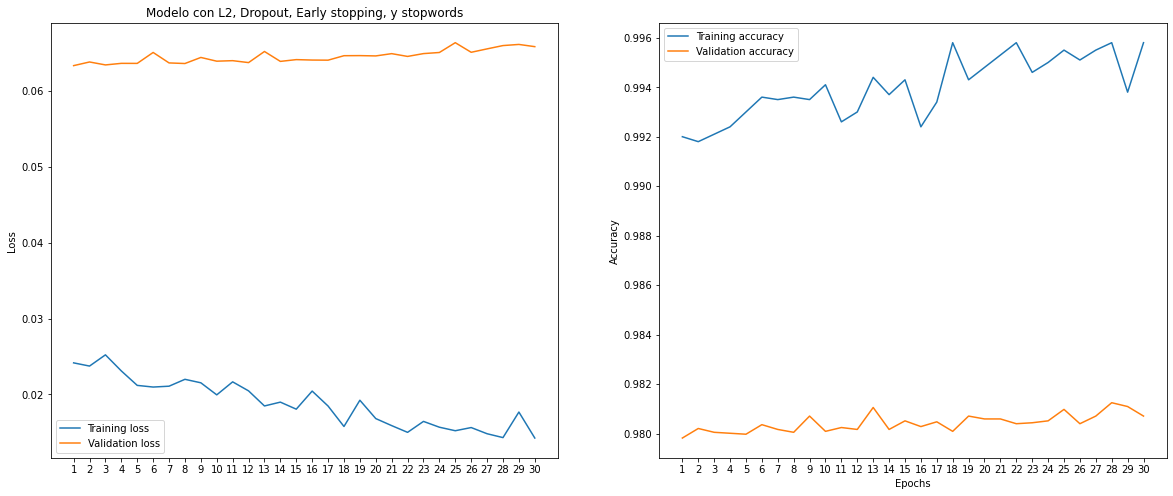

In [ ]:
model_fit_(X_train_1_1_sw,X_test_1_1_sw,y_train,y_test,callbacks_list, network)

### Con StopWords

8980/8980 [==============================] - 0s 24us/step
Matrix Confusion:
[[3849  801]
 [2415 1915]]
Accuracy:
0.6418707966804504


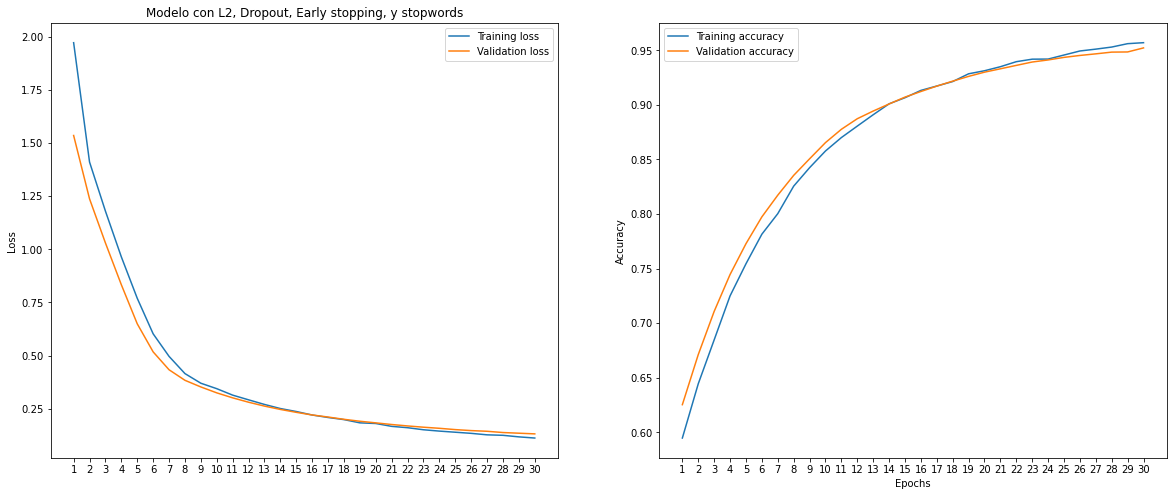

In [ ]:
model_fit_(X_train_1_1,X_test_1_1,y_train,y_test,callbacks_list,network)

## Modelo ngrams=2

### Sin StopWords

281/281 [==============================] - 0s 1ms/step - loss: 1.1641 - accuracy: 0.5759
Matrix Confusion:
[[3210 1440]
 [2368 1962]]
Accuracy:
0.575946569442749


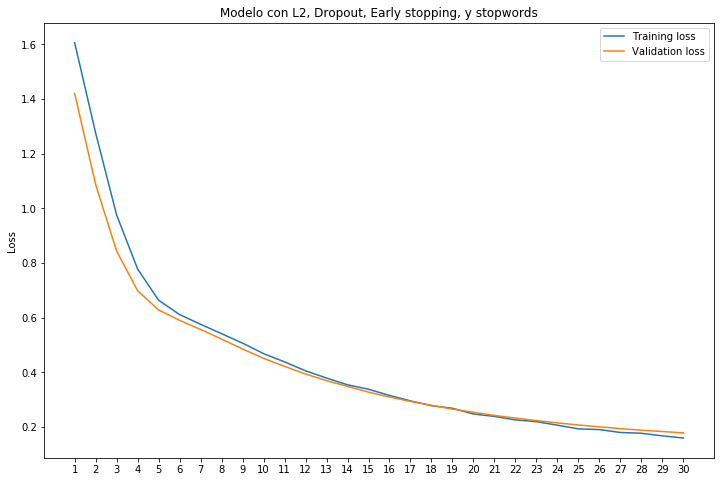

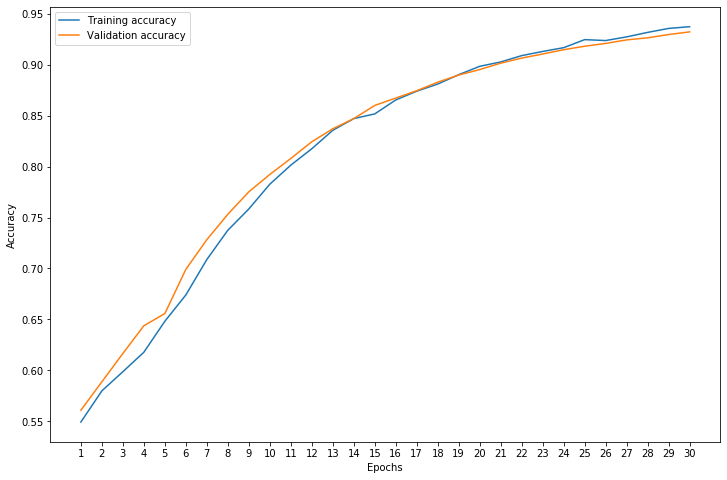

In [ ]:
model_fit_(X_train_2_2_sw,X_test_2_2_sw,y_train,y_test,callbacks_list=[])

### Con StopWords

281/281 [==============================] - 0s 2ms/step - loss: 0.9554 - accuracy: 0.6193
Matrix Confusion:
[[3399 1251]
 [2168 2162]]
Accuracy:
0.6192650198936462


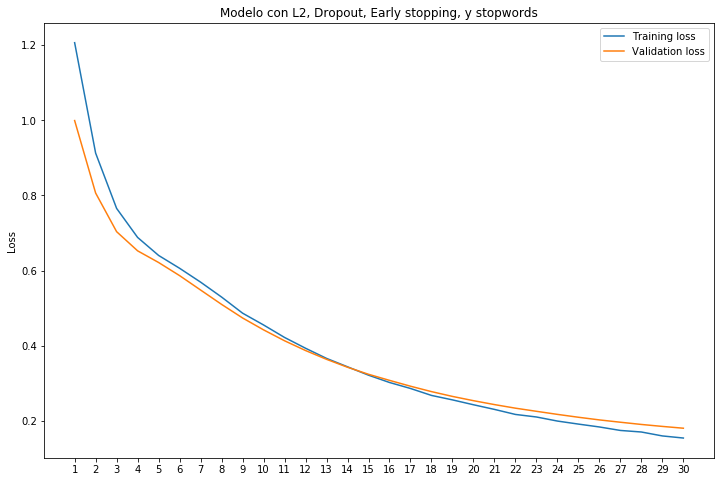

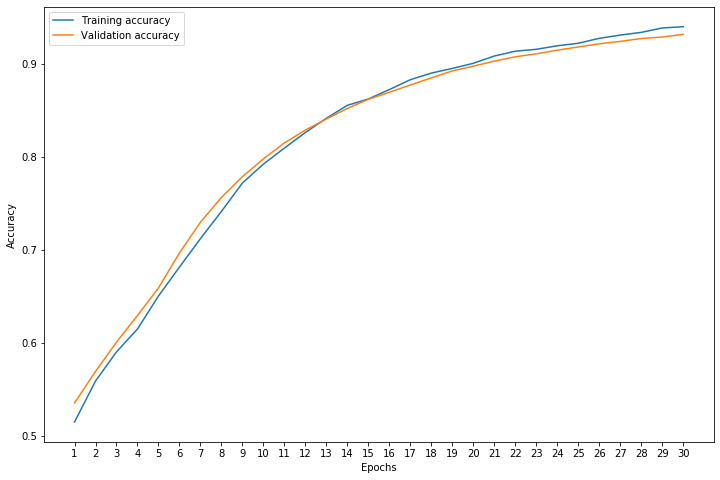

In [ ]:
model_fit_(X_train_2_2,X_test_2_2,y_train,y_test,callbacks_list=[])

## Modelo ngrams=(1,3)

### Sin StopWords

281/281 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.7249
Matrix Confusion:
[[4055  595]
 [1875 2455]]
Accuracy:
0.7249442934989929


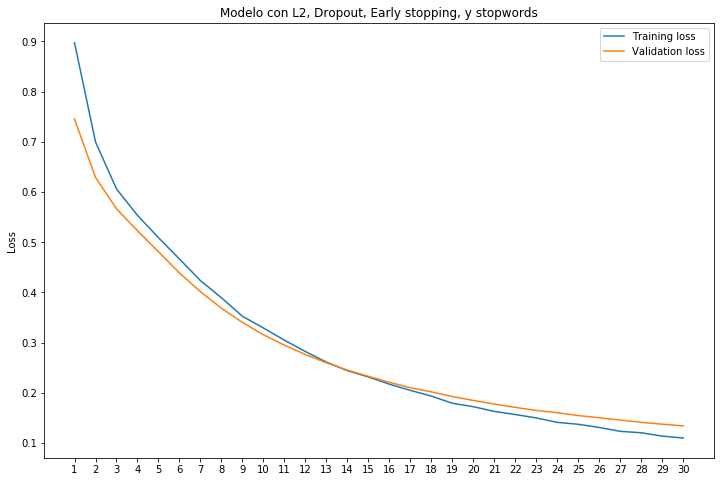

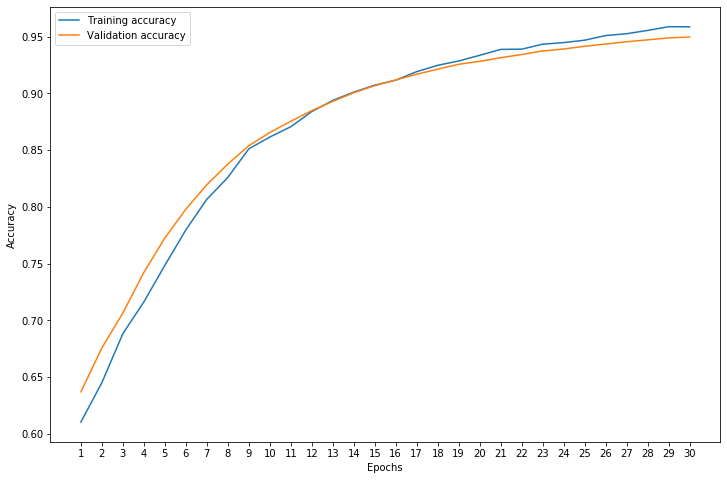

In [ ]:
model_fit_(X_train_1_3_sw,X_test_1_3_sw,y_train,y_test,callbacks_list,network)

### Con StopWords

8980/8980 [==============================] - 0s 33us/step
Matrix Confusion:
[[4650    0]
 [4330    0]]
Accuracy:
0.5178173780441284


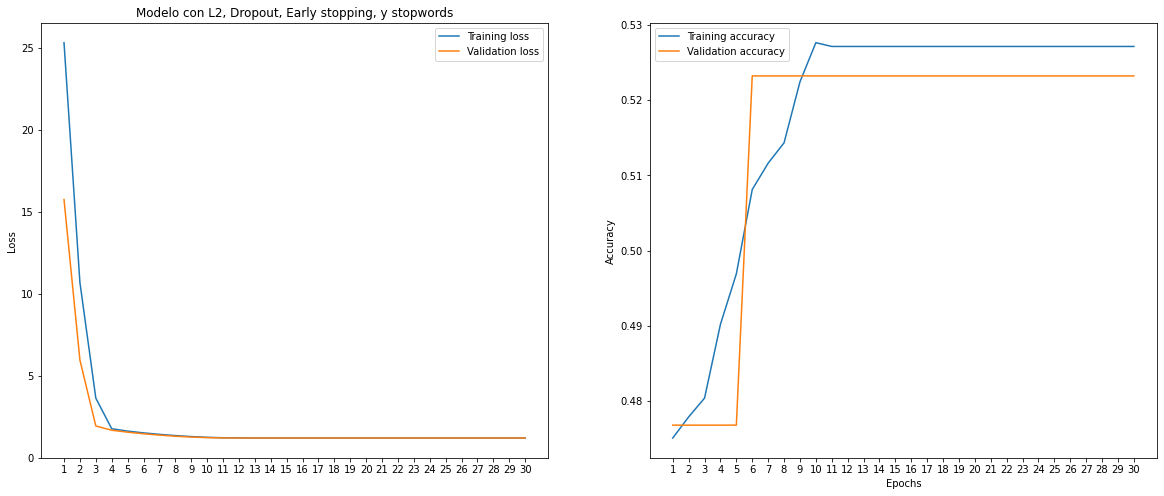

In [ ]:
model_fit_(X_train_1_3,X_test_1_3,y_train,y_test,callbacks_list,network_L2)

8980/8980 [==============================] - 0s 23us/step
Matrix Confusion:
[[4292  358]
 [1173 3157]]
Accuracy:
0.8295100331306458


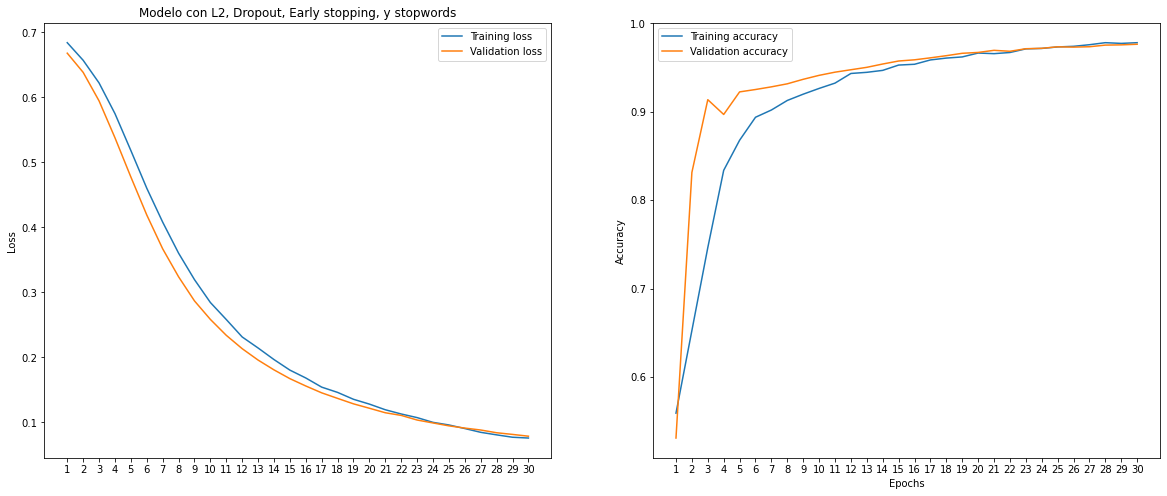

In [ ]:
model_fit_(X_train_1_3,X_test_1_3,y_train,y_test,callbacks_list,network)